In [1]:
import models.utils
import random, gc, os, pickle, csv, time, re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator

In [2]:
tasks = [
    ['YelpDataset', 'AGNewsDataset', 'DBPediaDataset', 'AmazonDataset', 'YahooAnswersDataset'],
    ['DBPediaDataset', 'YahooAnswersDataset', 'AGNewsDataset', 'AmazonDataset', 'YelpDataset'],
    ['YelpDataset', 'YahooAnswersDataset', 'AmazonDataset', 'DBPediaDataset', 'AGNewsDataset'],
    ['AGNewsDataset', 'YelpDataset',  'AmazonDataset', 'YahooAnswersDataset', 'DBPediaDataset'],
]
task2label = {
    "YelpDataset": "Yelp",
    "AGNewsDataset": "AGNews",
    "DBPediaDataset": "DBPedia",
    "AmazonDataset": "Amazon",
    "YahooAnswersDataset": "Yahoo"
}

In [3]:
def make_5plot(task, order_data):
    fig, ax =  plt.subplots(5, figsize=(10,15))
    x = np.arange(5) # For each epoch

    for key,value in order_data.items():
        values = [list(map(float,epoch.split("\t"))) for epoch in value.split("\n")] # Change to 2d array of each task in each epoch
        values = np.transpose(values)
        for epoch, epoch_row in enumerate(values):
            ax[epoch].plot(x, epoch_row, label=key)

    #Set x ticks as center -- no need? 
    # https://matplotlib.org/stable/gallery/ticks/centered_ticklabels.html
    my_xticks = [task2label[t] for t in task]
    for i, axi in enumerate(ax):
        axi.grid(True)


        axi.set_ylim(0,1)
        axi.yaxis.set_major_locator(MaxNLocator(4))
        axi.yaxis.set_major_formatter("{x:.0%}")
        axi.xaxis.set_major_locator(MaxNLocator(5))

        axi.set_ylabel("Accuracy")
        axi.set_title(task2label[task[i]], fontsize=10)
        # Remove xtick 
        # https://stackoverflow.com/questions/12998430/how-to-remove-xticks-from-a-plot
        axi.tick_params(axis='x', labelbottom=False)


    ax[-1].tick_params(axis='x', labelbottom=True)
    ax[-1].set_xticks(x, my_xticks)
    ax[-1].set_xlabel("Training Progress")
    ax[-1].legend(loc = 3)  # lower left https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

# Order 1

In [4]:
order1_data = {
    "Sequential": """0.665	0.000	0.000	0.585	0.000
0.000	0.927	0.000	0.000	0.000
0.000	0.000	0.981	0.000	0.000
0.623	0.000	0.120	0.621	0.000
0.015	0.000	0.048	0.005	0.759""",
    "Replay": """0.664	0.000	0.000	0.589	0.000
0.513	0.926	0.000	0.079	0.000
0.466	0.782	0.987	0.263	0.000
0.639	0.811	0.834	0.631	0.000
0.534	0.002	0.234	0.387	0.767""",
    "$\mathregular{LAMOL_{REAL}^{0.05}}$": """0.610	0.000	0.000	0.524	0.000
0.599	0.932	0.000	0.510	0.048
0.589	0.925	0.990	0.497	0.071
0.578	0.926	0.989	0.550	0.067
0.584	0.888	0.982	0.550	0.705""",
    "OML-ER": """0.638	0.000	0.000	0.575	0.000
0.599	0.913	0.000	0.390	0.000
0.590	0.868	0.985	0.485	0.000
0.603	0.872	0.975	0.613	0.000
0.560	0.888	0.982	0.551	0.746""",
    "Meta-MbPA" : """0.608	0.000	0.000	0.565	0.000
0.563	0.931	0.000	0.463	0.000
0.576	0.904	0.991	0.489	0.000
0.584	0.877	0.988	0.590	0.000
0.561	0.860	0.986	0.565	0.753""",
    "MeLSTA": """0.682	0.000	0.000	0.600	0.000
0.656	0.939	0.000	0.334	0.000
0.647	0.909	0.988	0.504	0.000
0.662	0.889	0.988	0.644	0.000
0.654	0.906	0.989	0.618	0.773"""
}

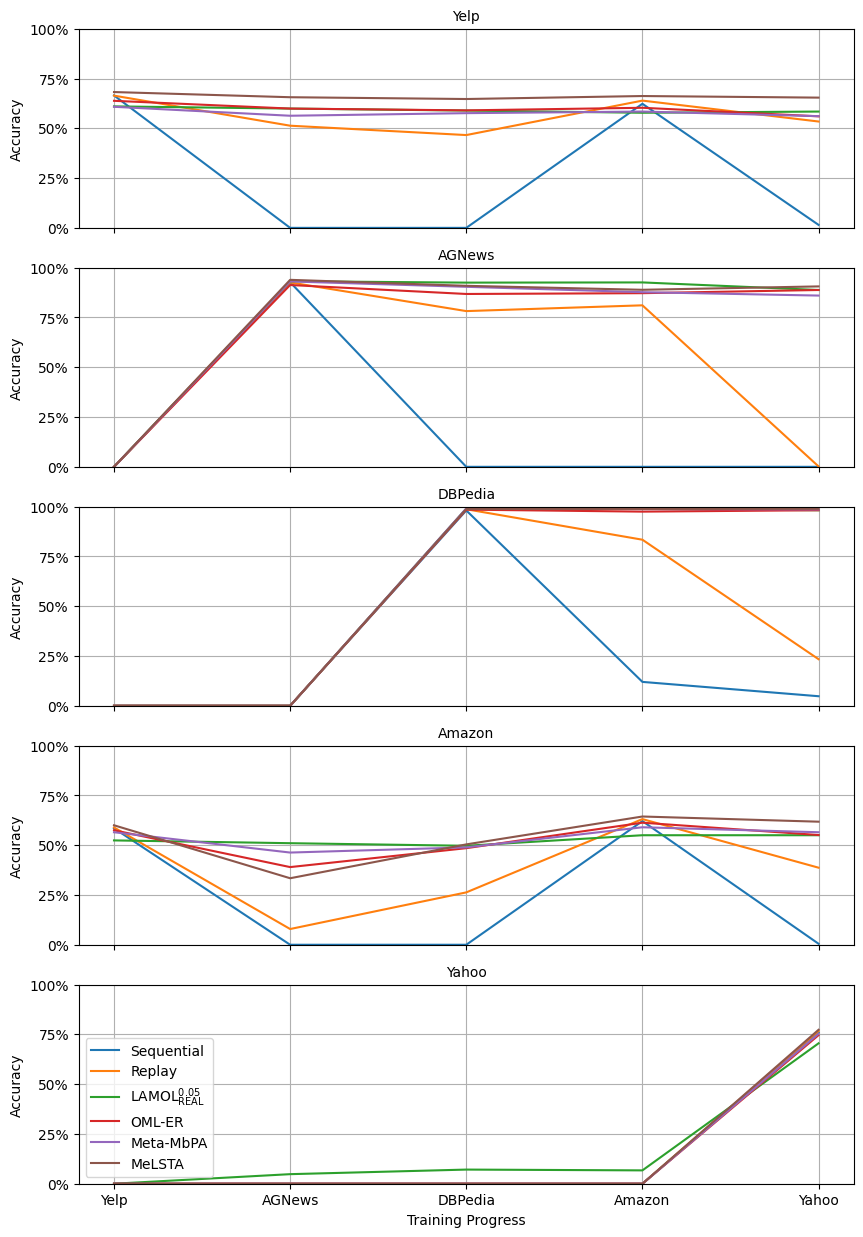

In [6]:
task = tasks[0]
make_5plot(task, order1_data)

# Order 2

In [7]:
order2_data = {
    "Sequential": """0.986	0.000	0.000	0.000	0.000
0.000	0.767	0.000	0.000	0.000
0.000	0.000	0.929	0.000	0.000
0.000	0.000	0.108	0.616	0.598
0.000	0.000	0.067	0.591	0.650""",
    "Replay": """0.988	0.000	0.000	0.000	0.000
0.968	0.767	0.000	0.000	0.000
0.268	0.246	0.930	0.000	0.000
0.825	0.111	0.791	0.614	0.587
0.861	0.451	0.729	0.592	0.659""",
    "$\mathregular{LAMOL_{REAL}^{0.05}}$": """0.991	0.000	0.001	0.000	0.000
0.988	0.698	0.406	0.009	0.010
0.981	0.671	0.925	0.058	0.063
0.986	0.657	0.917	0.542	0.539
0.984	0.659	0.916	0.542	0.620""",
    "OML-ER": """0.979	0.000	0.000	0.000	0.000
0.981	0.749	0.000	0.000	0.000
0.972	0.722	0.909	0.000	0.000
0.975	0.707	0.881	0.546	0.564
0.974	0.706	0.888	0.504	0.595""",
    "Meta-MbPA" : """0.991	0.000	0.000	0.000	0.000
0.989	0.745	0.000	0.000	0.000
0.985	0.703	0.934	0.000	0.000
0.986	0.624	0.876	0.593	0.495
0.988	0.679	0.876	0.605	0.607""",
    "MeLSTA": """0.989	0.000	0.000	0.000	0.000
0.984	0.773	0.000	0.000	0.000
0.983	0.759	0.940	0.000	0.000
0.984	0.754	0.920	0.638	0.617
0.989	0.748	0.911	0.622	0.681"""
}

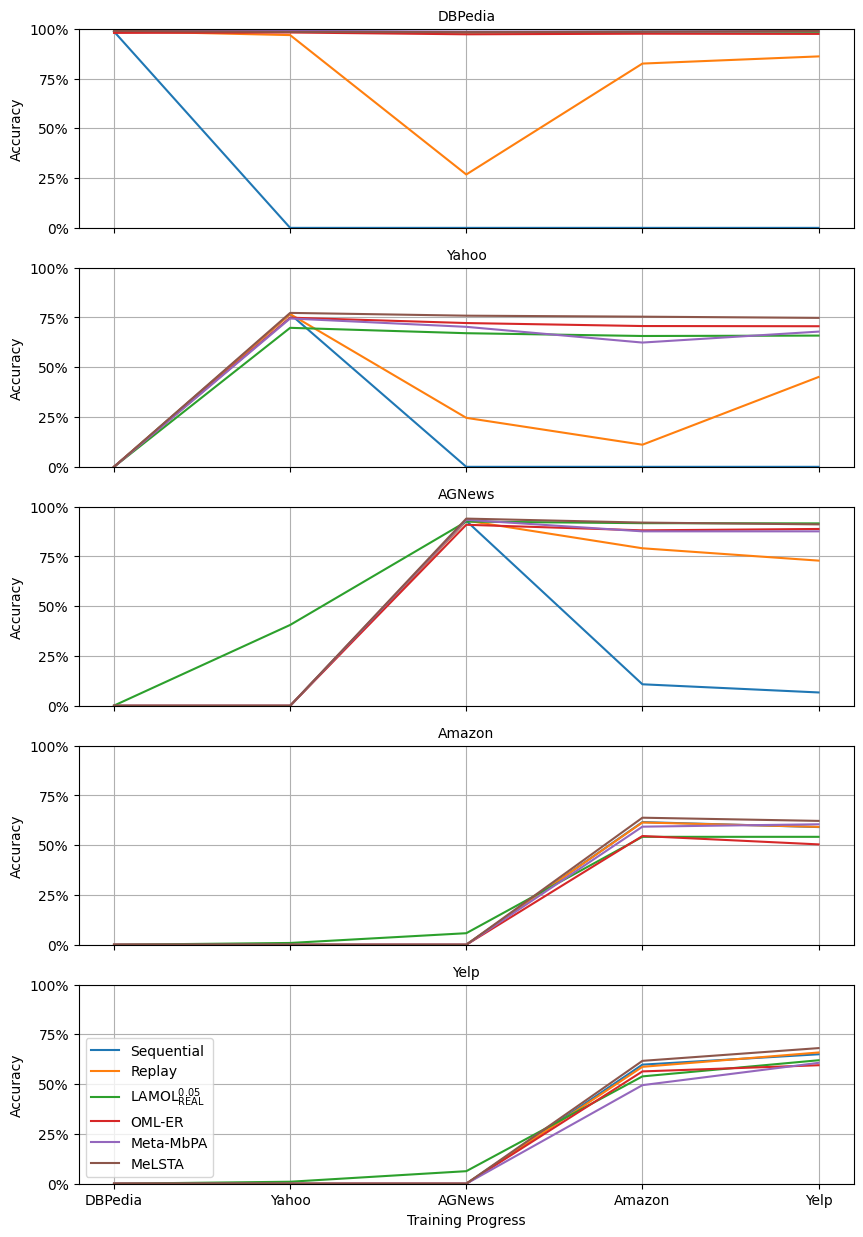

In [8]:
task = tasks[1]
make_5plot(task, order2_data)

# Order 3

In [9]:
order3_data = {
    "Sequential": """0.665	0.000	0.585	0.000	0.000
0.070	0.766	0.002	0.000	0.000
0.642	0.000	0.635	0.000	0.000
0.003	0.001	0.005	0.986	0.000
0.000	0.000	0.000	0.000	0.929""",
    "Replay": """0.664	0.000	0.589	0.000	0.000
0.525	0.766	0.057	0.000	0.000
0.635	0.350	0.638	0.000	0.000
0.598	0.540	0.576	0.986	0.000
0.439	0.125	0.364	0.835	0.928""",
    "$\mathregular{LAMOL_{REAL}^{0.05}}$": """0.610	0.000	0.523	0.000	0.000
0.603	0.691	0.511	0.000	0.411
0.581	0.661	0.551	0.000	0.395
0.589	0.678	0.544	0.990	0.407
0.579	0.633	0.537	0.982	0.925""",
    "OML-ER": """0.638	0.000	0.570	0.000	0.000
0.594	0.751	0.244	0.000	0.000
0.628	0.728	0.600	0.000	0.000
0.634	0.735	0.593	0.983	0.000
0.587	0.706	0.554	0.980	0.899""",
    "Meta-MbPA" : """0.608	0.000	0.554	0.000	0.000
0.579	0.750	0.420	0.025	0.000
0.598	0.694	0.609	0.043	0.000
0.546	0.694	0.553	0.992	0.000
0.540	0.624	0.555	0.986	0.935""",
    "MeLSTA": """0.682	0.000	0.600	0.000	0.000
0.651	0.774	0.302	0.000	0.000
0.661	0.733	0.642	0.000	0.000
0.660	0.740	0.617	0.989	0.000
0.638	0.749	0.583	0.982	0.935"""
}

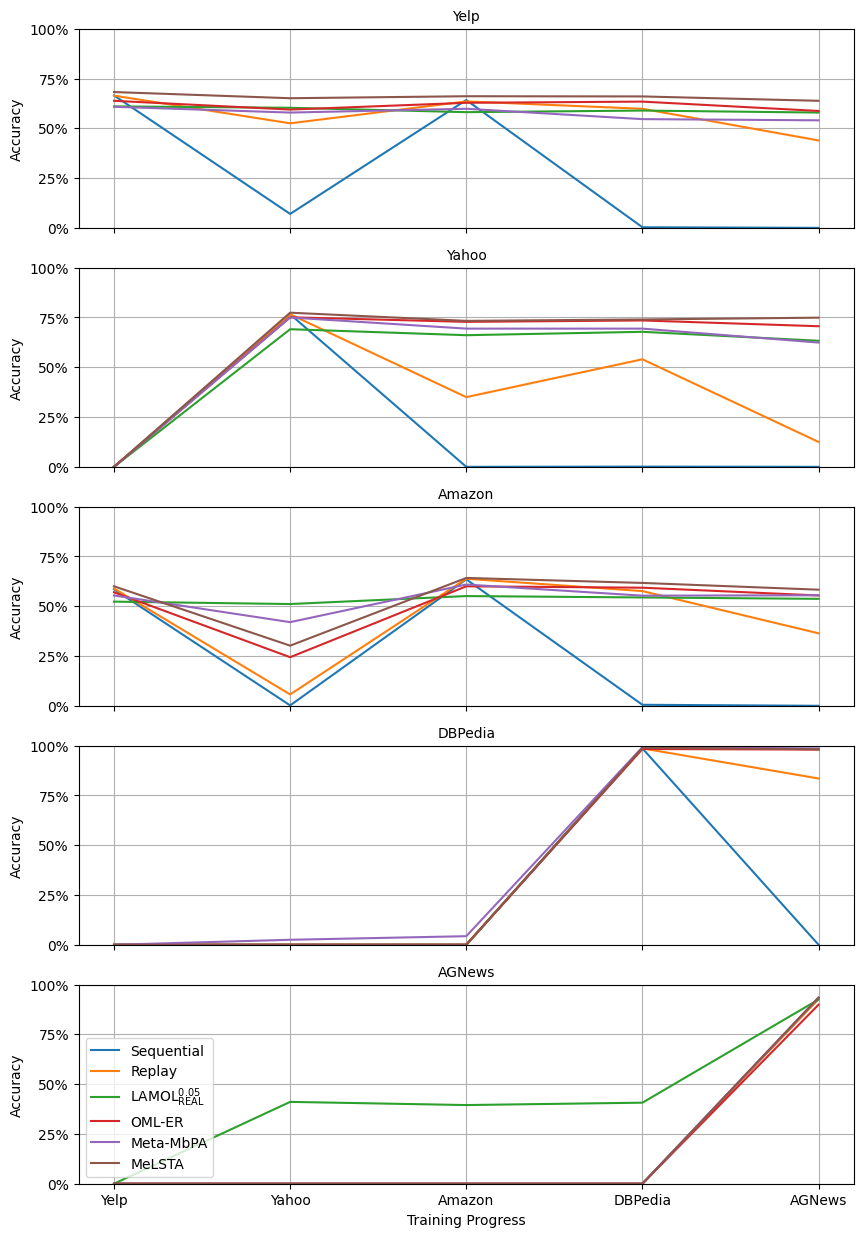

In [10]:
task = tasks[2]
make_5plot(task, order3_data)

# Order 4

In [11]:
order4_data = {
    "Sequential": """0.931	0.000	0.000	0.000	0.000
0.003	0.650	0.577	0.000	0.000
0.000	0.636	0.633	0.000	0.000
0.000	0.004	0.001	0.758	0.000
0.000	0.009	0.001	0.142	0.984""",
    "Replay": """0.933	0.000	0.000	0.000	0.000
0.862	0.648	0.559	0.000	0.000
0.852	0.634	0.621	0.000	0.000
0.075	0.455	0.236	0.762	0.000
0.769	0.583	0.542	0.602	0.988""",
    "$\mathregular{LAMOL_{REAL}^{0.05}}$": """0.933	0.000	0.000	0.037	0.000
0.923	0.602	0.518	0.042	0.002
0.926	0.583	0.555	0.026	0.001
0.896	0.583	0.540	0.692	0.001
0.909	0.583	0.551	0.693	0.990""",
    "OML-ER": """0.913	0.000	0.000	0.000	0.000
0.877	0.606	0.527	0.000	0.000
0.851	0.577	0.540	0.000	0.000
0.885	0.604	0.552	0.752	0.000
0.878	0.606	0.574	0.729	0.983""",
    "Meta-MbPA" : """0.938	0.000	0.000	0.000	0.000
0.908	0.602	0.542	0.000	0.000
0.893	0.591	0.612	0.000	0.000
0.880	0.548	0.510	0.728	0.000
0.880	0.556	0.526	0.697	0.992""",
    "MeLSTA": """0.939	0.000	0.000	0.000	0.000
0.912	0.676	0.605	0.000	0.000
0.884	0.651	0.637	0.000	0.000
0.895	0.617	0.599	0.771	0.000
0.896	0.654	0.618	0.762	0.989"""
}

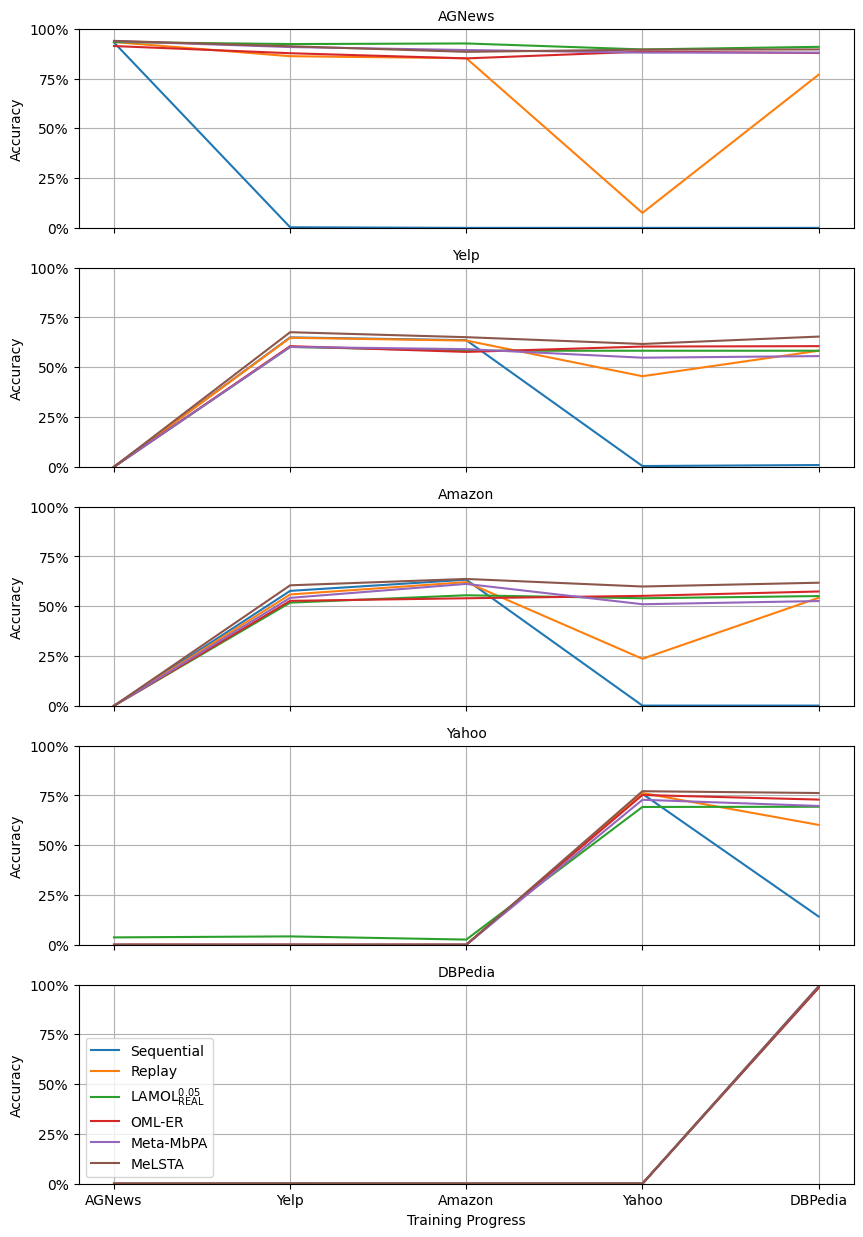

In [12]:
task = tasks[3]
make_5plot(task, order4_data)

In [93]:
def make_aaplot(axi, task, order_data, metric="aa", title=""):
    x = np.arange(5) # For each epoch

    for key,value in order_data.items():
        #print(key)
        values = [list(map(float,epoch.split("\t"))) for epoch in value.split("\n")] # Change to 2d array of each task in each epoch
        #values = np.transpose(values)
        
        aa_list = []
        aia_list = []
        forgetting_list = []
        fm_list = []
        for epoch, epoch_row in enumerate(values):
            aa = np.mean(epoch_row[:epoch+1])
            aa_list.append(aa)
            aia_list.append(np.mean(aa_list))
            
            
            max_perf = [0]*len(epoch_row) if epoch == 0 else np.max(np.array(values[:epoch]), axis=0)
            forget = [0]*len(epoch_row) if epoch == 0 else (max_perf - np.array(values[epoch])).tolist()
            forget = forget[:epoch]
            #print("FORGET", forget)
            forgetting_list.append(forget)
            fm_list.append(np.mean(forget))
        #print("FM", fm_list)
            
            
        #print(aa_list)
        if metric == "aa":
            metric_name = "AA"#"Average Accuracy"
            to_plot = aa_list
        elif metric == "aia":
            metric_name = "AIA" #"Average Incremental Accuracy"
            to_plot = aia_list
        elif metric == "fm":
            metric_name = "FM" #"Forgetting Measure"
            fm_list[0] = 0
            to_plot = fm_list
        axi.plot(x, to_plot, label=key) # , linewidth=1 , alpha=0.7
        
        
        my_xticks = [task2label[t] for t in task]
        axi.grid(True)
        axi.set_ylim(0,1)
        axi.yaxis.set_major_locator(MaxNLocator(4))
        axi.yaxis.set_major_formatter("{x:.0%}")
        axi.xaxis.set_major_locator(MaxNLocator(5))
        axi.tick_params(axis='both', which='major', labelsize=12 , labelcolor="dimgray")
        axi.set_ylabel(metric_name , fontsize=16)
        axi.set_title(title, fontsize=15)
        axi.set_xticks(x, my_xticks) # , fontsize=14

# AA

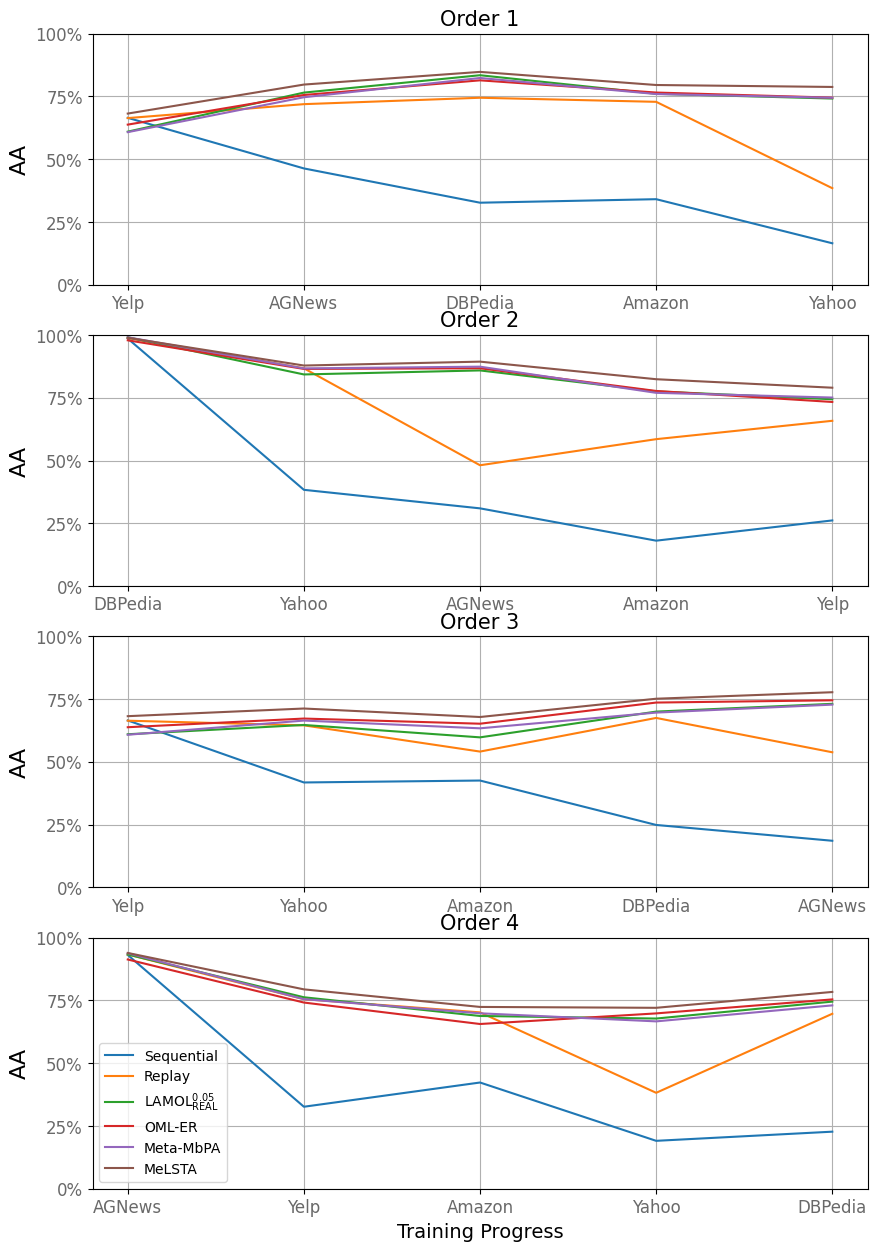

In [94]:
fig, ax =  plt.subplots(4, figsize=(10,15))
make_aaplot(ax[0], tasks[0], order1_data, "aa", "Order 1")
make_aaplot(ax[1], tasks[1], order2_data, "aa", "Order 2")
make_aaplot(ax[2], tasks[2], order3_data, "aa", "Order 3")
make_aaplot(ax[3], tasks[3], order4_data, "aa", "Order 4")
ax[-1].set_xlabel("Training Progress", fontsize=14)
ax[-1].legend(loc = 3)

# AIA

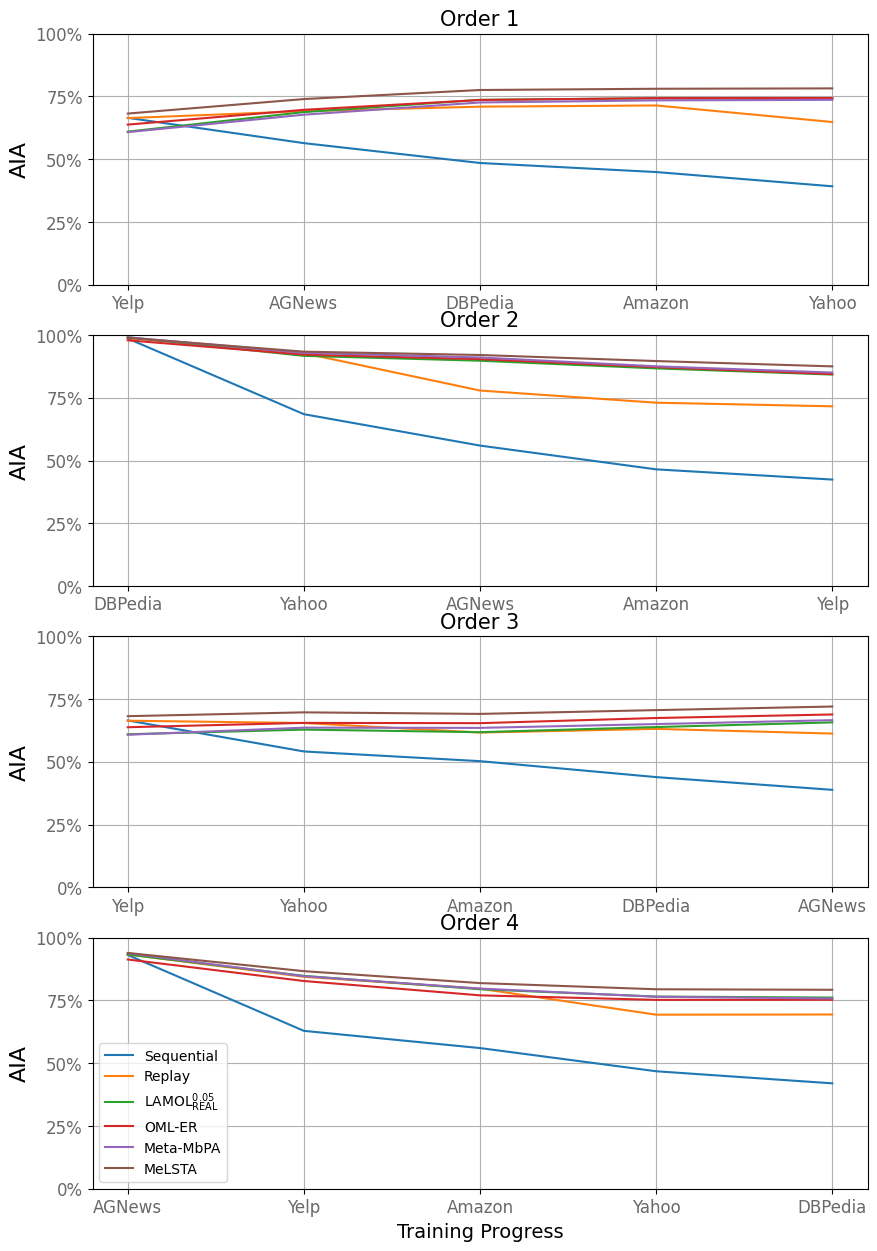

In [95]:
fig, ax =  plt.subplots(4, figsize=(10,15))
make_aaplot(ax[0], tasks[0], order1_data, "aia", "Order 1")
make_aaplot(ax[1], tasks[1], order2_data, "aia", "Order 2")
make_aaplot(ax[2], tasks[2], order3_data, "aia", "Order 3")
make_aaplot(ax[3], tasks[3], order4_data, "aia", "Order 4")
ax[-1].set_xlabel("Training Progress", fontsize=14)
ax[-1].legend(loc = 3)

# FM

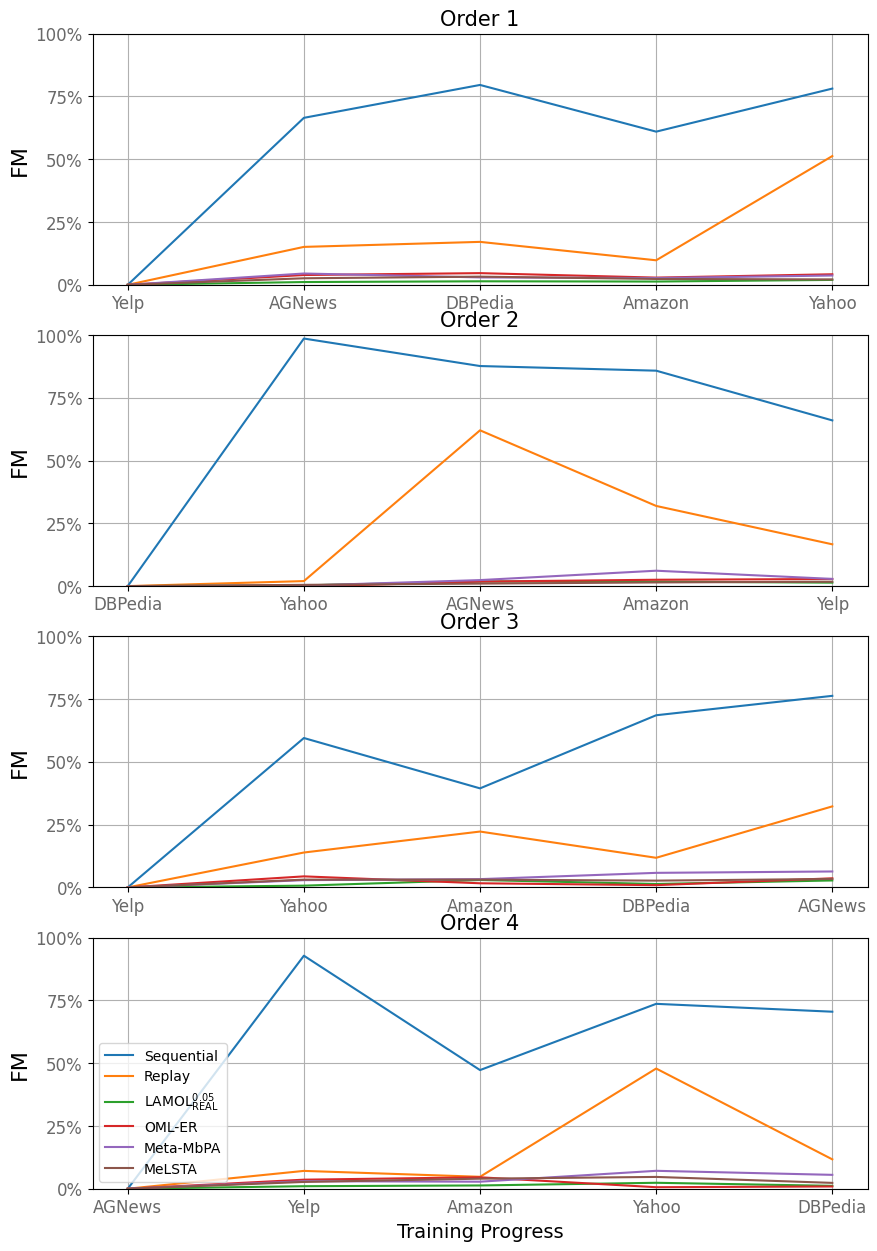

In [96]:
fig, ax =  plt.subplots(4, figsize=(10,15))
make_aaplot(ax[0], tasks[0], order1_data, "fm", "Order 1")
make_aaplot(ax[1], tasks[1], order2_data, "fm", "Order 2")
make_aaplot(ax[2], tasks[2], order3_data, "fm", "Order 3")
make_aaplot(ax[3], tasks[3], order4_data, "fm", "Order 4")
ax[-1].set_xlabel("Training Progress", fontsize=14)
ax[-1].legend(loc = 3)